This short exploration aims to use machine learning algorithms to predict Pokemon type based on their stats. I use a decision tree, SVM, KNN and neural network to predict Pokemon type. The data comes from Kaggle user alopez247 and includes Pokemon up to Generation 6. 

Link: https://www.kaggle.com/alopez247/pokemon

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('./pokemon.csv')

Hex codes for colors obtained from http://www.epidemicjohto.com/t882-type-colors-hex-colors. 

In [3]:
types = list(set(df.Type_1.values))
colors = {'Normal':'#a8a77a',
          'Fire':'#ee8130',
          'Water':'#6390f0',
          'Electric':'#f7d02c',
          'Grass':'#7ac74c',
          'Ice':'#96d9d6', 
          'Fighting':'#c22e28',
          'Poison':'#a33ea1',
          'Ground':'#e2bf65', 
          'Flying': '#a98ff3',
          'Psychic':'#f95587',
          'Bug':'#a6b91a',
          'Rock':'#b6a136',
          'Ghost':'#735797',
          'Dragon':'#6f35fc',
          'Dark':'#705746',
          'Steel':'#b7b7ce',
          'Fairy':'#d685ad'}

For curiosity, I calculate the mean stats of each type. I do this in two ways, one where I look at both Type 1 and Type 2, and one where I only look at Type 1. 

In [4]:
atk = {}
dfe = {}
spatk = {}
spdfe = {}
spd = {}
hp = {}
for t in types:
    atk[t] = np.mean(df[(df.Type_1 == t) | (df.Type_2 == t)].Attack)
    dfe[t] = np.mean(df[(df.Type_1 == t) | (df.Type_2 == t)].Defense)
    spatk[t] = np.mean(df[(df.Type_1 == t) | (df.Type_2 == t)].Sp_Atk)
    spdfe[t] = np.mean(df[(df.Type_1 == t) | (df.Type_2 == t)].Sp_Def)
    spd[t] = np.mean(df[(df.Type_1 == t) | (df.Type_2 == t)].Speed)
    hp[t] = np.mean(df[(df.Type_1 == t) | (df.Type_2 == t)].HP)

atk_o = {}
dfe_o = {}
spatk_o = {}
spdfe_o = {}
spd_o = {}
hp_o = {}
for t in types:
    atk_o[t] = np.mean(df[(df.Type_1 == t)].Attack)
    dfe_o[t] = np.mean(df[(df.Type_1 == t)].Defense)
    spatk_o[t] = np.mean(df[(df.Type_1 == t)].Sp_Atk)
    spdfe_o[t] = np.mean(df[(df.Type_1 == t)].Sp_Def)
    spd_o[t] = np.mean(df[(df.Type_1 == t)].Speed)
    hp_o[t] = np.mean(df[(df.Type_1 == t)].HP)


Now I manipulate the data so the mean values, along with the labels and colors, can be graphed.

In [5]:
def make_tuple_list(d):
    l = []
    for t in d:
        l.append((t,d[t]))
    return l

atk_l = make_tuple_list(atk_o)
dfe_l = make_tuple_list(dfe_o)
spatk_l = make_tuple_list(spatk_o)
spdfe_l = make_tuple_list(spdfe_o)
spd_l = make_tuple_list(spd_o)
hp_l = make_tuple_list(hp_o)

In [6]:
atk_l = sorted(atk_l,key = lambda x: x[1])
dfe_l = sorted(dfe_l,key = lambda x: x[1])
spatk_l = sorted(spatk_l,key = lambda x: x[1])
spdfe_l = sorted(spdfe_l,key = lambda x: x[1])
spd_l = sorted(spd_l,key = lambda x: x[1])
hp_l = sorted(hp_l,key = lambda x: x[1])

In [7]:
atk_desc = [x[1] for x in atk_l]
atk_labels = [x[0] for x in atk_l]
atk_colors = [colors[l] for l in atk_labels]
dfe_desc = [x[1] for x in dfe_l]
dfe_labels = [x[0] for x in dfe_l]
dfe_colors = [colors[l] for l in dfe_labels]
spatk_desc = [x[1] for x in spatk_l]
spatk_labels = [x[0] for x in spatk_l]
spatk_colors = [colors[l] for l in spatk_labels]
spdfe_desc = [x[1] for x in spdfe_l]
spdfe_labels = [x[0] for x in spdfe_l]
spdfe_colors = [colors[l] for l in spdfe_labels]
spd_desc = [x[1] for x in spd_l]
spd_labels = [x[0] for x in spd_l]
spd_colors = [colors[l] for l in spd_labels]
hp_desc = [x[1] for x in hp_l]
hp_labels = [x[0] for x in hp_l ]
hp_colors = [colors[l] for l in hp_labels]

Graphs for each stat

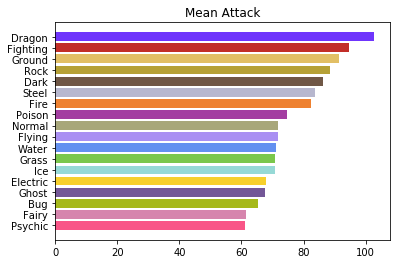

In [8]:
plt.barh(range(len(atk_desc)),atk_desc,color=atk_colors)
plt.title('Mean Attack')
plt.yticks(range(len(atk_desc)),atk_labels)
plt.show()
#Do the same for other types

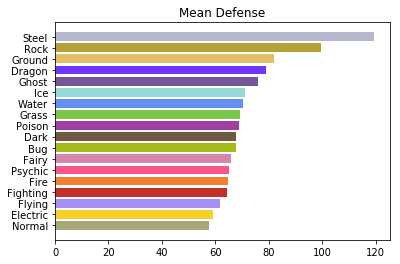

In [9]:
plt.barh(range(len(dfe_desc)),dfe_desc,color=dfe_colors)
plt.title('Mean Defense')
plt.yticks(range(len(dfe_desc)),dfe_labels)
plt.show()

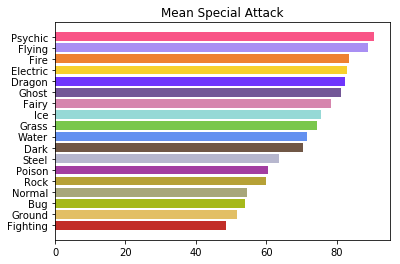

In [10]:
plt.barh(range(len(spatk_desc)),spatk_desc,color=spatk_colors)
plt.title('Mean Special Attack')
plt.yticks(range(len(spatk_desc)),spatk_labels)
plt.show()

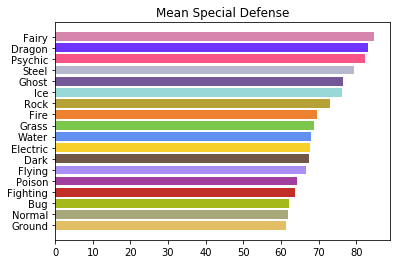

In [11]:
plt.barh(range(len(spdfe_desc)),spdfe_desc,color=spdfe_colors)
plt.title('Mean Special Defense')
plt.yticks(range(len(spdfe_desc)),spdfe_labels)
plt.show()

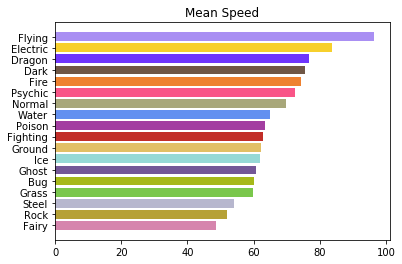

In [12]:
plt.barh(range(len(spd_desc)),spd_desc,color=spd_colors)
plt.title('Mean Speed')
plt.yticks(range(len(spd_desc)),spd_labels)
plt.show()

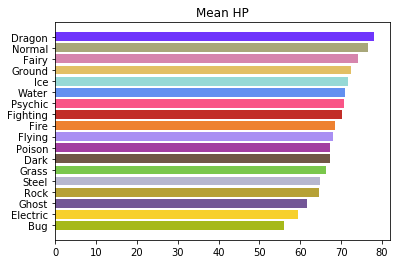

In [13]:
plt.barh(range(len(hp_desc)),hp_desc,color=hp_colors)
plt.title('Mean HP')
plt.yticks(range(len(hp_desc)),hp_labels)
plt.show()

I standardize the stats of each Pokemon by dividing each stat by the total stat. This is so the stat values for different Pokemon can be compared, because some (such as unevolved forms) have much lower stats than others. I use these standardized stats as input into various models. 

In [14]:
def standardize_stats(df):
    df['Attack_s'] = df['Attack'] / df['Total']
    df['Defense_s'] = df['Defense'] / df['Total']
    df['Sp_Atk_s'] = df['Sp_Atk'] / df['Total']
    df['Sp_Def_s'] = df['Sp_Def'] / df['Total']
    df['Speed_s'] = df['Speed'] / df['Total']
    df['HP_s'] = df['HP'] / df['Total']
    
standardize_stats(df)

In [15]:
def assign_color(df,color_dict): 
    df['Type_Color'] = df['Type_1'].apply(lambda x: color_dict[x])
    
assign_color(df,colors)

I make a 2D plot of Attack and Special Attack (standardized) to see if any combinations of two stats could separate the types well.

(0, 0.4)

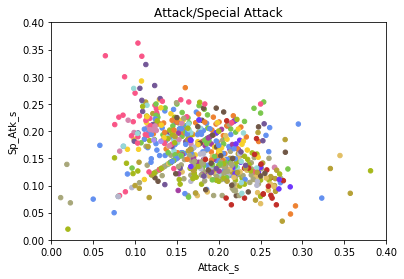

In [16]:
df.plot.scatter('Attack_s','Sp_Atk_s',c=df.Type_Color,title='Attack/Special Attack')
plt.xlim(0,0.4)
plt.ylim(0,0.4)

The types look clumped together. Looking at the positions of Fire, Water and Grass types separately,
we see that their locations overlap significantly. 

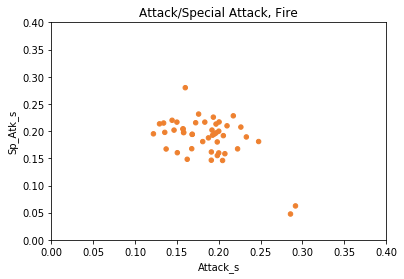

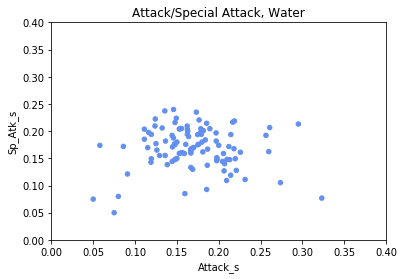

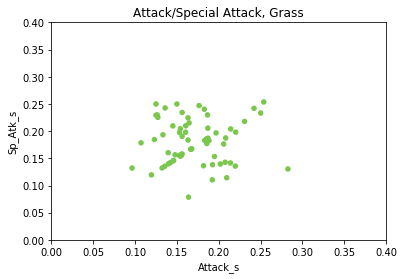

In [17]:
df[df.Type_1 == 'Fire'].plot.scatter('Attack_s','Sp_Atk_s',c=df[df.Type_1 == 'Fire'].Type_Color,title='Attack/Special Attack, Fire')
plt.xlim(0,0.4)
plt.ylim(0,0.4)
df[df.Type_1 == 'Water'].plot.scatter('Attack_s','Sp_Atk_s',c=df[df.Type_1 == 'Water'].Type_Color,title='Attack/Special Attack, Water')
plt.xlim(0,0.4)
plt.ylim(0,0.4)
df[df.Type_1 == 'Grass'].plot.scatter('Attack_s','Sp_Atk_s',c=df[df.Type_1 == 'Grass'].Type_Color,title='Attack/Special Attack, Grass')
plt.xlim(0,0.4)
plt.ylim(0,0.4)
plt.show()

The same is true for all the other combinations of two stats. 

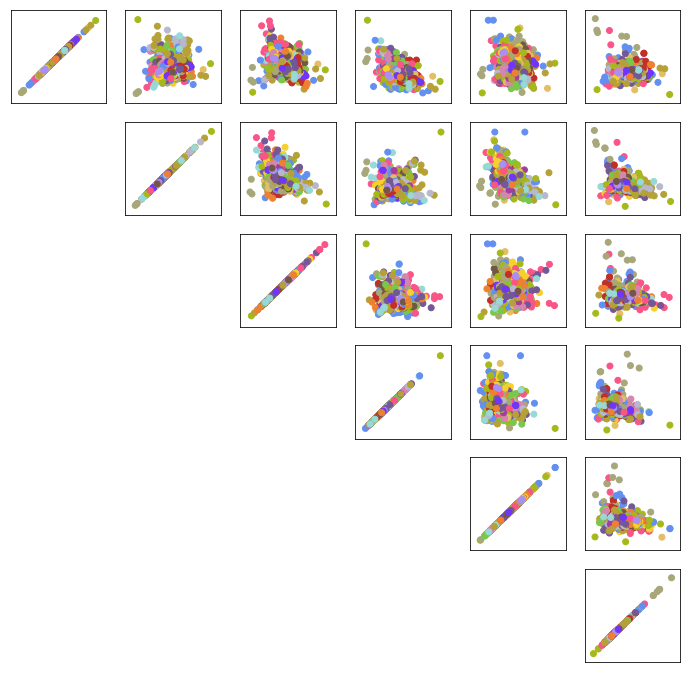

In [18]:
stats = ['Attack_s','Defense_s','Sp_Atk_s','Sp_Def_s','Speed_s','HP_s']
plt.figure(figsize=(12,12))
for i in range(len(stats)): 
    for j in range(i,len(stats)):
        f = plt.subplot(6,6,6*i+j+1)
        plt.scatter(df[stats[i]],df[stats[j]],color=df.Type_Color)
        f.axes.get_xaxis().set_ticks([])
        f.axes.get_yaxis().set_ticks([])
plt.show()

We can see if PCA will separate the types more cleanly. 

In [19]:
from sklearn.decomposition import PCA
X = df[['Attack_s','Defense_s','Sp_Atk_s','Sp_Def_s','Speed_s','HP_s']]
y = df['Type_1']

In [20]:
pca = PCA(n_components=3)
X_new = pca.fit_transform(X)
print(pca.explained_variance_ratio_)

[0.33011457 0.24302934 0.20354702]


In [21]:
from mpl_toolkits.mplot3d import Axes3D

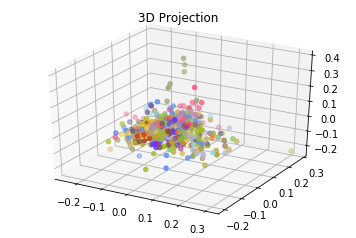

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X_new[:,0],X_new[:,1],X_new[:,2],c=df['Type_Color'])
plt.title('3D Projection')
plt.show()

In [23]:
pca = PCA(n_components=2)
X_2dpca = pca.fit_transform(X)

Text(0.5,1,'2D Projection')

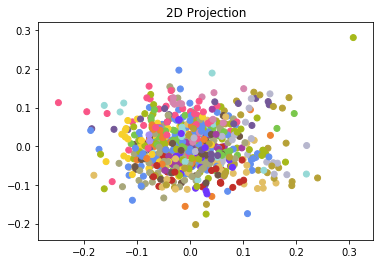

In [24]:
plt.scatter(X_2dpca[:,0],X_2dpca[:,1],c=df['Type_Color'])
plt.title('2D Projection')

However, for both the 2D and 3D projections, the types are still overlap significantly. We cannot get an obvious decision boundary to separate the types. This suggests that Pokemon of different types could have similar stat distributions, and may make it difficult to separate the types based on stats alone. Nevertheless, we can still try a few models. 

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=24)
clf = DecisionTreeClassifier(min_samples_split=3,max_depth=6)
clf.fit(X_train,y_train)
print(clf.score(X_test,y_test))

0.21658986175115208


We achieve an accuracy of 22% on the test set. While this is not a high absolute accuracy, this is much greater
than the 5.5% chance of randomly guessing the type correctly, so in relative terms the decision tree performs decently.

In [26]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train,y_train)
print('Training accuracy: {}'.format(clf.score(X_train,y_train)))
print('Test accuracy: {}'.format(clf.score(X_test,y_test)))

Training accuracy: 0.14682539682539683
Test accuracy: 0.14285714285714285


As expected, the SVM does not perform well, even on the training set, because the scatter plots above show 
that the stat distributions are similar across different types. Next, we try the KNN algorithm. 

Text(0.5,0,'Number of Neighbors')

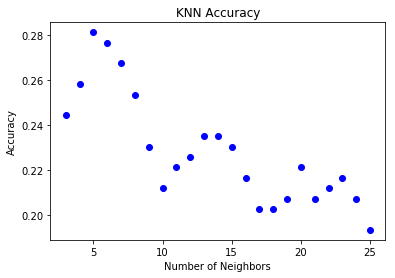

In [27]:
from sklearn.neighbors import KNeighborsClassifier
accuracies = []
for i in range(3,26):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train,y_train)
    accuracies.append(clf.score(X_test,y_test))
plt.plot(range(3,26),accuracies,'bo')
plt.title('KNN Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')

Creating a model for each value of k from 3 to 35, we see that the greatest validation accuracy is achieved at just over 28% by setting
k = 5. So the KNN model performs slightly better than the 22% of the decision tree. 

Finally, we can try using a neural network. However, the results cannot be expected to be good, 
because there are only 721 Pokemon in the dataset, which is not a lot of data. 

In [28]:
from keras.utils.np_utils import to_categorical
class_dict = {x[1]:x[0] for x in enumerate(types)}

Using TensorFlow backend.


In [29]:
df['class'] = df['Type_1'].apply(lambda x: class_dict[x])

In [30]:
y_oh = to_categorical(df['class'])
print(y_oh.shape)

(721, 18)


In [31]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(4,activation='relu',input_shape=(6,)))
model.add(layers.Dense(4,activation='relu'))
model.add(layers.Dense(18,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
model.fit(X,y_oh,epochs=10,batch_size=None)

Epoch 1/10
721/721 [==============================] - 0s 328us/step - loss: 2.8912 - acc: 0.0264
Epoch 2/10
721/721 [==============================] - 0s 98us/step - loss: 2.8792 - acc: 0.0610
Epoch 3/10
721/721 [==============================] - 0s 94us/step - loss: 2.8691 - acc: 0.1262
Epoch 4/10
721/721 [==============================] - 0s 91us/step - loss: 2.8601 - acc: 0.1415
Epoch 5/10
721/721 [==============================] - 0s 85us/step - loss: 2.8508 - acc: 0.1456
Epoch 6/10
721/721 [==============================] - 0s 82us/step - loss: 2.8416 - acc: 0.1442
Epoch 7/10
721/721 [==============================] - 0s 100us/step - loss: 2.8314 - acc: 0.1442
Epoch 8/10
721/721 [==============================] - 0s 94us/step - loss: 2.8206 - acc: 0.1456
Epoch 9/10
721/721 [==============================] - 0s 99us/step - loss: 2.8090 - acc: 0.1456
Epoch 10/10
721/721 [==============================] - 0s 96us/step - loss: 2.7958 - acc: 0.1456


Even fitting the entire dataset to a neural network yields only a 15% accuracy, so a NN is not a good model to use for our prediction. 

In conclusion, plotting various combinations of stats showed that they do not differentiate types very well. This was evident in the results, where our best model showed only 28% accuracy on a validation set. With that said, with only a 6% chance of guessing a given Pokemon's type correctly at random, we still managed to uncover some relationship between stat distribution and type. 